In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("readr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 520151 bytes (507 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [3]:
%%R
library("readr")

In [4]:
%%R
install.packages("igraph")
install.packages("ggraph")
install.packages("ggthemes")
install.packages("dplyr")
install.packages("pander")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/igraph_1.2.11.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2398028 bytes (2.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [10]:
%%R
library("igraph")
library("ggraph")
library("ggthemes")
library("dplyr")
library("pander")

In [11]:
%%R
graficar <- function(dataframe,nombre,s){
    g <- graph.data.frame(dataframe,directed = F)
    f<-plot.igraph(g,
            vertex.size=degree(g,mode = "in")*s, # Tamaño de nodo
            edge.arrow.size=0.2, # tamaño de flecha de la arista
            edge.arrow.width=0.6, # ancho de flecha de la arista
            edge.color="black", # color de arista
            edge.curved = T, # arista curva
            vertex.label.cex=0.8, # tamaño de las etiquetas de los nodos
            main=paste("Relación Emociones e Intensiones ",nombre), 
            vertex.label.color="black", # color de las etiquetas de los nodos
            vertex.color="white", # color de nodos
            #vertex.label.family="arial"
            )
  
    g
}


In [12]:
%%R
estadisticas <- function(grafico){
  g <- degree(grafico,mode = "out") 
  b <- betweenness(graph = grafico)  
  c <- closeness(grafico, vids = V(grafico), mode = "out")
  aus <- authority_score(grafico)$vector
  e = eccentricity(grafico, mode = "out")
  resultado <- data.frame(
      "degree"=g,
      "betweenness"=b,
      "closeness"=c,
      "autorithy score"=aus,
      "eccentricity"=e)
  
  m <- mean_distance(grafico)
  d<-diameter(grafico)
  ed <- edge_density(grafico, loops = FALSE)
  t<-transitivity(grafico)
  r<-reciprocity(grafico)
  resultadoG <- data.frame(
      "mean distance"=m,
      "diameter"=d,
      "edge density"=ed,
      "transitivity"=t,
      "reciprocity"=r
      )

  print(resultado)
  
  print("----Metricas Generales----")
  print(resultadoG)
  resultado
}


## Corona Fake

### Eng

In [14]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

coronaFEng <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappingcoronaEngNF60T.csv')


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.


R[write to console]: New names:
* `` -> ...1



Rows: 145 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (2): intention, emocion
dbl (2): ...1, intentionPercent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
%%R
df = coronaFEng[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

# A tibble: 145 × 3
   intention emocion      intentionPercent
   <chr>     <chr>                   <dbl>
 1 Informar  anger                     Inf
 2 Informar  anticipation              Inf
 3 Informar  disgust                   Inf
 4 Informar  fear                      Inf
 5 Informar  joy                       Inf
 6 Informar  sadness                   Inf
 7 Informar  surprise                  Inf
 8 Informar  trust                     Inf
 9 Informar  disgust                   Inf
10 Informar  anger                     Inf
11 Informar  anger                     Inf
12 Informar  fear                      Inf
13 Informar  anger                     Inf
14 Informar  sadness                   Inf
15 Informar  anger                     Inf
16 Informar  trust                     Inf
17 Informar  anticipation              Inf
18 Informar  disgust                   Inf
19 Informar  anticipation              Inf
20 Informar  fear                      Inf
21 Informar  anticipation         

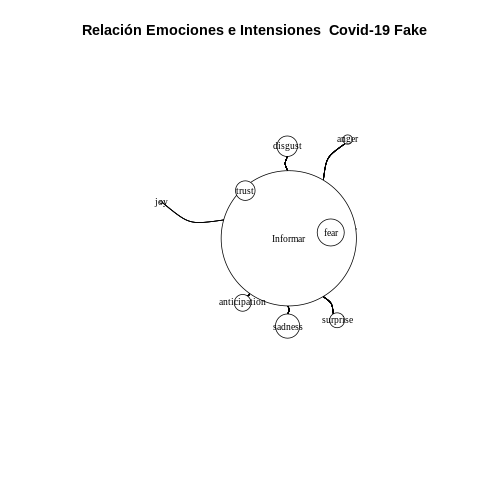

In [16]:
%%R
graf <- graficar(df,"Covid-19 Fake",1)

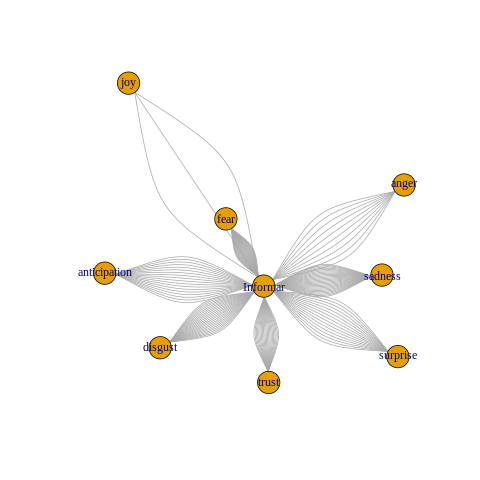

In [17]:
%%R
plot(graf)

In [18]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Informar        145          28 0.12500000      1.00000000            1
anger            10           0 0.06666667      0.05541856            2
anticipation     18           0 0.06666667      0.09975341            2
disgust          22           0 0.06666667      0.12192083            2
fear             29           0 0.06666667      0.16071382            2
joy               3           0 0.06666667      0.01662557            2
sadness          26           0 0.06666667      0.14408825            2
surprise         16           0 0.06666667      0.08866970            2
trust            21           0 0.06666667      0.11637898            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.777778        2     4.027778            0           1


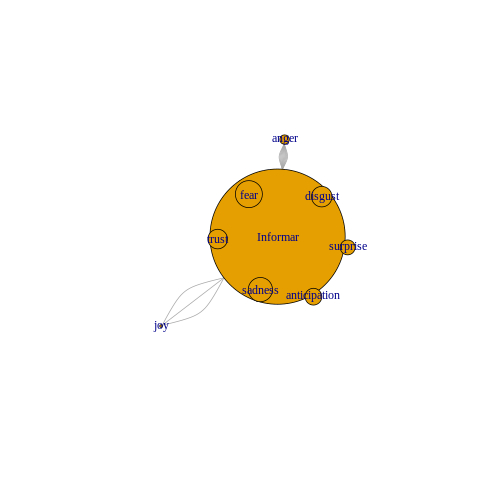

In [19]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h)

### Esp

In [ ]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

coronaFEsp <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappingcoronaEspF60T.csv')


In [ ]:
%%R
df = coronaFEsp[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

In [ ]:
%%R
graf <- graficar(df,"Corona Fake Esp",4)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

## Politic


### Eng

In [20]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

politicFEng <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappingpoliticEngNF60T.csv')


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.


R[write to console]: New names:
* `` -> ...1



Rows: 40 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (2): intention, emocion
dbl (2): ...1, intentionPercent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
%%R
df = politicFEng[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

# A tibble: 40 × 3
   intention emocion      intentionPercent
   <chr>     <chr>                   <dbl>
 1 Informar  anticipation              Inf
 2 Informar  disgust                   Inf
 3 Informar  fear                      Inf
 4 Informar  joy                       Inf
 5 Informar  surprise                  Inf
 6 Informar  trust                     Inf
 7 Informar  anger                     Inf
 8 Informar  fear                      Inf
 9 Informar  anticipation              Inf
10 Informar  joy                       Inf
11 Informar  anticipation              Inf
12 Informar  trust                     Inf
13 Informar  disgust                   Inf
14 Informar  fear                      Inf
15 Informar  disgust                   Inf
16 Informar  sadness                   Inf
17 Informar  sadness                   Inf
18 Informar  fear                      Inf
19 Informar  surprise                  Inf
20 Informar  fear                      Inf
21 Informar  surprise              

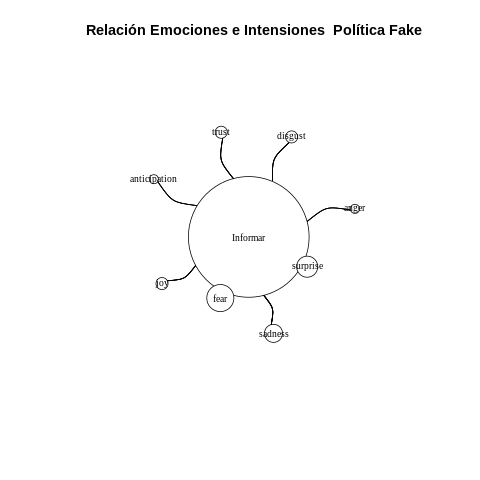

In [22]:
%%R
graf <- graficar(df,"Política Fake",3)

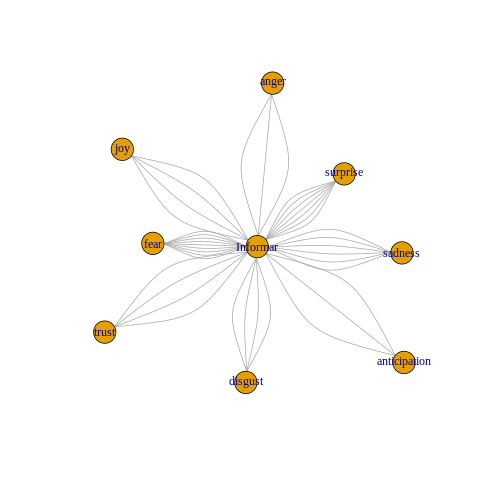

In [23]:
%%R
plot(graf)

In [24]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Informar         40          28 0.12500000           1.000            1
anticipation      3           0 0.06666667           0.075            2
disgust           4           0 0.06666667           0.100            2
fear              9           0 0.06666667           0.225            2
joy               4           0 0.06666667           0.100            2
surprise          7           0 0.06666667           0.175            2
trust             4           0 0.06666667           0.100            2
anger             3           0 0.06666667           0.075            2
sadness           6           0 0.06666667           0.150            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.777778        2     1.111111            0           1


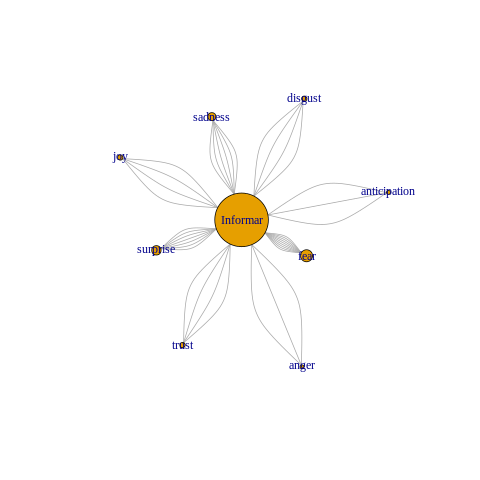

In [25]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h)

### Esp

In [ ]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

politicFEsp <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappingpoliticEspF60T.csv')


In [ ]:
%%R
df = politicFEsp[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

In [ ]:
%%R
graf <- graficar(df,"Politic Fake Esp",4)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

## Gossip

### Eng

In [ ]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

gossipFEng <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappinggossipEngF60T.csv')


ℹ Using '\',\'' as decimal and '\'.\'' as grouping mark. Use `read_delim()` for more control.

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  intention = col_character(),
  emocion = col_character(),
  intentionPercent = col_character()
)



In [ ]:
%%R
df = gossipFEng[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

# A tibble: 10 x 3
   intention emocion intentionPercent
   <chr>     <chr>              <dbl>
 1 Difamar   disgust           0.0561
 2 Difamar   anger             0.108 
 3 Difamar   fear              0.108 
 4 Difamar   anger             0.0601
 5 Difamar   sadness           0.0601
 6 Difamar   sadness           0.0807
 7 Difamar   fear              0.0807
 8 Difamar   anger             0.0601
 9 Difamar   sadness           0.0601
10 Difamar   fear              0.0601


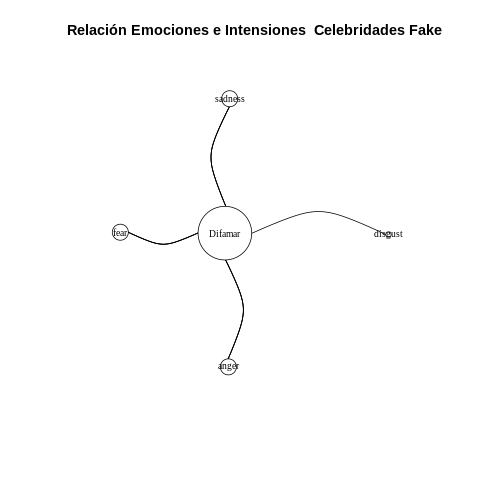

In [ ]:
%%R
graf <- graficar(df,"Celebridades Fake",4)

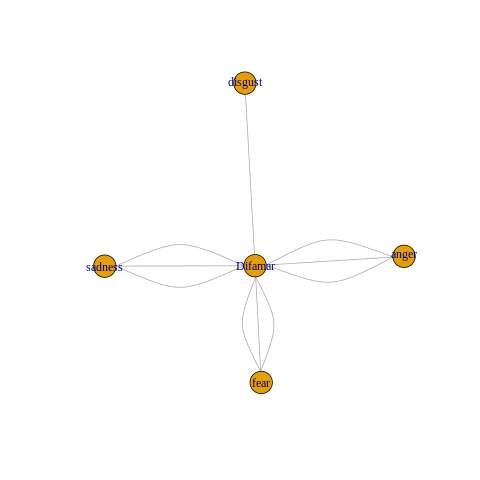

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
a = estadisticas(graf)

        degree betweenness closeness autorithy.score eccentricity
Difamar     10           6 0.2500000       0.0000000            1
disgust      1           0 0.1428571       0.3333333            2
anger        3           0 0.1428571       1.0000000            2
fear         3           0 0.1428571       1.0000000            2
sadness      3           0 0.1428571       1.0000000            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1           1.6        2            1            0           1


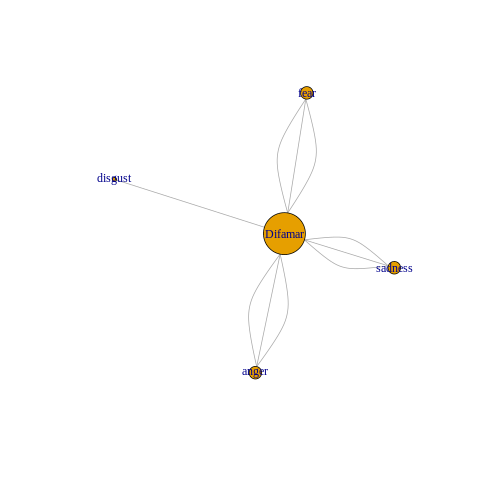

In [ ]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h*3)

### Esp

In [ ]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

gossipFEsp <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappinggossipEspF60T.csv')


In [ ]:
%%R
df = gossipFEsp[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))

print(tbl_df(df), n=40)

In [ ]:
%%R
graf <- graficar(df,"Gossip Fake Esp",4)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

## General

### Eng

In [ ]:
%%R

dfFEng <- bind_rows(coronaFEng,politicFEng,gossipFEng)
dfFEng = transform(dfFEng,intentionPercent = as.numeric(intentionPercent))
dfFEng = dfFEng[c("intention","emocion","intentionPercent")]
dfFEng

      intention emocion intentionPercent
1  Crear alarma    fear       0.78048780
2  Crear alarma sadness       0.60975610
3  Crear alarma   anger       0.31707317
4  Crear alarma    fear       0.31707317
5  Crear alarma   anger       0.29268293
6  Crear alarma sadness       0.29268293
7  Crear alarma disgust       0.36585366
8  Crear alarma    fear       0.36585366
9  Crear alarma disgust       0.36585366
10 Crear alarma sadness       0.36585366
11 Crear alarma    fear       0.60975610
12 Crear alarma sadness       0.60975610
13 Crear alarma   trust       0.26829268
14 Crear alarma    fear       0.26829268
15 Crear alarma   trust       0.26829268
16 Crear alarma sadness       0.26829268
17      Difamar    fear       0.33962264
18      Difamar sadness       0.33962264
19      Hibrida   anger       0.29729730
20      Hibrida    fear       0.29729730
21      Hibrida   anger       0.27027027
22      Hibrida sadness       0.27027027
23      Hibrida   anger       0.27027027
24      Hibrida 

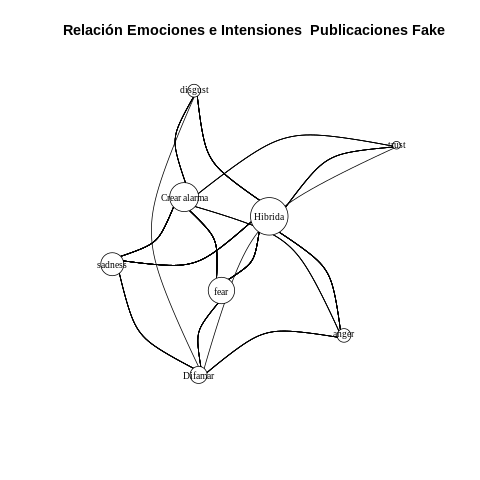

In [ ]:
%%R
graf <- graficar(dfFEng,"Publicaciones Fake",0.6)

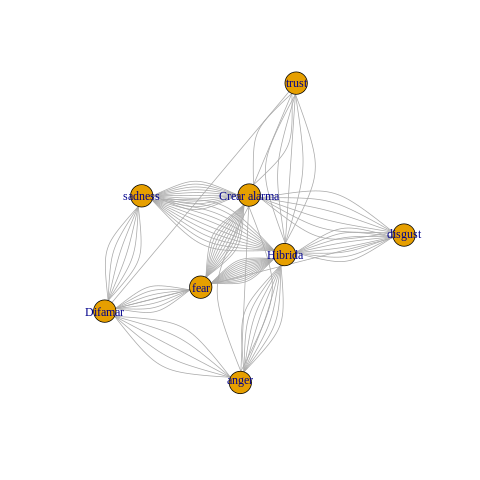

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Crear alarma     34  3.00641106 0.11111111       0.8300595            2
Difamar          20  0.93674041 0.11111111       0.4943525            2
Hibrida          44  6.05684854 0.11111111       1.0000000            2
fear             31  1.32774451 0.09090909       0.7244548            2
sadness          27  1.01285664 0.09090909       0.6255337            2
anger            16  0.35648703 0.09090909       0.3669374            2
disgust          15  0.21632030 0.09090909       0.3814533            2
trust             9  0.08659152 0.09090909       0.2260328            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.464286        2          3.5            0           1


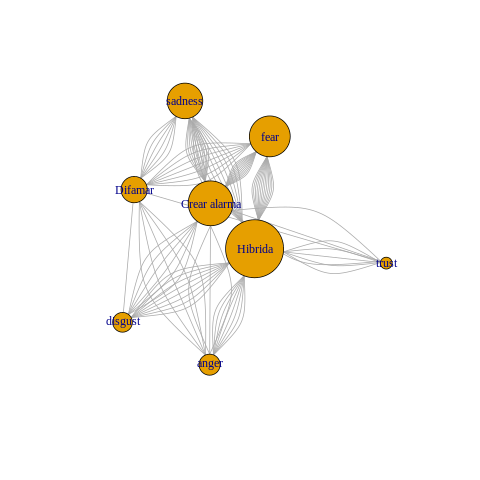

In [ ]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h)

### Esp


In [ ]:
%%R
dfFEsp <- bind_rows(coronaFEsp,politicFEsp,gossipFEsp)
dfFEsp = transform(dfFEsp,intentionPercent = as.numeric(intentionPercent))
dfFEsp = dfFEsp[c("intention","emocion","intentionPercent")]
dfFEsp

In [ ]:
%%R
graf <- graficar(dfFEsp,"Publicaciones Fake Esp",1)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

# General noFake

## General

### Eng

In [ ]:
%%R

dfFEng <- bind_rows(coronaFEng,politicFEng,gossipFEng)
dfFEng = transform(dfFEng,intentionPercent = as.numeric(intentionPercent))
dfFEng = dfFEng[c("intention","emocion","intentionPercent")]
dfFEng

      intention emocion intentionPercent
1  Crear alarma    fear       0.78048780
2  Crear alarma sadness       0.60975610
3  Crear alarma   anger       0.31707317
4  Crear alarma    fear       0.31707317
5  Crear alarma   anger       0.29268293
6  Crear alarma sadness       0.29268293
7  Crear alarma disgust       0.36585366
8  Crear alarma    fear       0.36585366
9  Crear alarma disgust       0.36585366
10 Crear alarma sadness       0.36585366
11 Crear alarma    fear       0.60975610
12 Crear alarma sadness       0.60975610
13 Crear alarma   trust       0.26829268
14 Crear alarma    fear       0.26829268
15 Crear alarma   trust       0.26829268
16 Crear alarma sadness       0.26829268
17      Difamar    fear       0.33962264
18      Difamar sadness       0.33962264
19      Hibrida   anger       0.29729730
20      Hibrida    fear       0.29729730
21      Hibrida   anger       0.27027027
22      Hibrida sadness       0.27027027
23      Hibrida   anger       0.27027027
24      Hibrida 

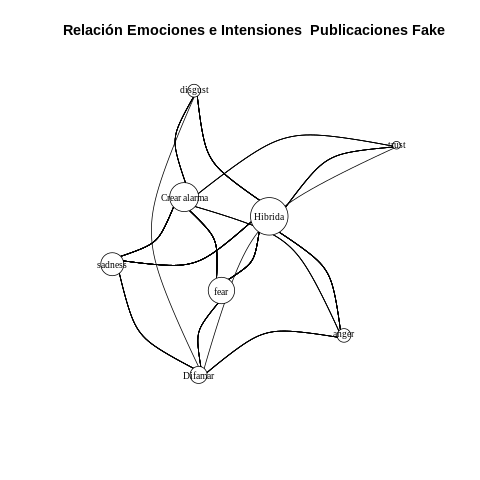

In [ ]:
%%R
graf <- graficar(dfFEng,"Publicaciones Fake",0.6)

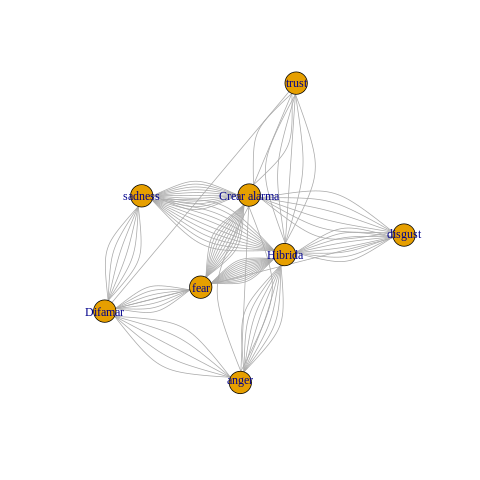

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Crear alarma     34  3.00641106 0.11111111       0.8300595            2
Difamar          20  0.93674041 0.11111111       0.4943525            2
Hibrida          44  6.05684854 0.11111111       1.0000000            2
fear             31  1.32774451 0.09090909       0.7244548            2
sadness          27  1.01285664 0.09090909       0.6255337            2
anger            16  0.35648703 0.09090909       0.3669374            2
disgust          15  0.21632030 0.09090909       0.3814533            2
trust             9  0.08659152 0.09090909       0.2260328            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.464286        2          3.5            0           1


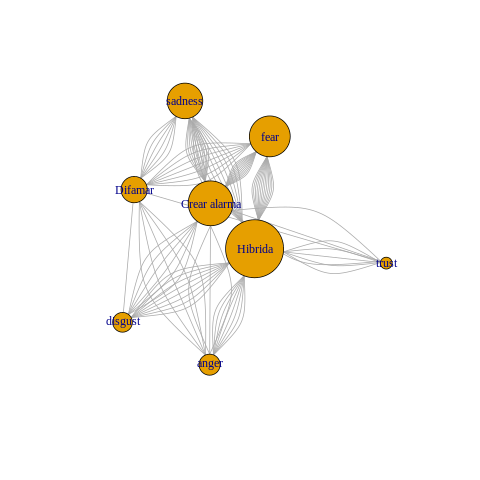

In [ ]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h)

### Esp


In [ ]:
%%R
dfFEsp <- bind_rows(coronaFEsp,politicFEsp,gossipFEsp)
dfFEsp = transform(dfFEsp,intentionPercent = as.numeric(intentionPercent))
dfFEsp = dfFEsp[c("intention","emocion","intentionPercent")]
dfFEsp

In [ ]:
%%R
graf <- graficar(dfFEsp,"Publicaciones Fake Esp",1)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)